<a href="https://colab.research.google.com/github/liamrogers03/COMP90054/blob/main/problem_set_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 01 - Blind Search




### Key concepts:
- State-space model
- Blind search algorithms: BFS, DFS and ID


### Set up the environment:
- Please run the following blocks of code to initialise the *environment*

In [1]:
!pip install pydotplus

In [2]:
import numpy as np
import pydotplus
from IPython.display import display, Image
from ipywidgets import interact

In [3]:
# Class of the problem

class Problem():
  initial_state = None
  state_space = None
  goal_states = None
  actions = None
  transition_function = None
  costs = None

  def __init__(self, initial_state, state_space, goal_states, actions, transition_function, costs):
    self.initial_state = initial_state
    self.state_space = state_space
    self.goal_states = goal_states
    self.actions = actions
    self.transition_function = transition_function
    self.costs = costs

    self.current_state = self.initial_state

    return

# Helper function to visualize the problem (i.e. draw state transition graph)
def generate_state_graph(problem):
  state_graph={}
  state_graph['nodes'] = {k:{'label':'\"{}\n{}\"'.format(k,' ')} for k in sorted(list(problem.state_space))}
  state_graph['nodes'][problem.initial_state]['color'] = 'green'
  for goal in problem.goal_states:
      state_graph['nodes'][goal]['shape'] = 'doublecircle'
  state_graph['edge'] = {k:{'label':str(problem.costs[k])} for k in problem.costs.keys()}
  return state_graph

def render_graph(param):
  s = ''
  s += 'digraph G { \n'

  for edge,tdict in param['edge'].items():
    tstr = edge[0] + '->' + edge[1] + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr

  for node,tdict in param['nodes'].items():
    tstr = node + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr

  s += ' \n}'

  #print (s)
  graph = pydotplus.graph_from_dot_data(s)
  return graph.create_png()


# Visulize the search process (not required)
def visulize_search_process(nodes,problem):
    progress = []

    for i,(state,value,parent) in enumerate(nodes):
        param = {}
        param['nodes'] = {str(k):{'label':'\"n{}\n{},{},{}\"'.format(k,state,cost,parent)} for k,(state,cost,parent) in enumerate(nodes[:i+1])}

        # The newly generated node is red while all other nodes are green
        for k in param['nodes']:
            param['nodes'][k]['color'] = 'green'
        param['nodes'][str(i)]['color'] = 'red'

        # Black edges
        param['edge'] = {(str(parent), str(k)): {'label': str(problem.costs[(nodes[parent][0], state)])} for k, (state, cost, parent) in enumerate(nodes[:i+1]) if not parent is None}
        for edge in param['edge']:
            param['edge'][edge]['color'] = 'black'

        progress.append(param)

    prog_imgs = [render_graph(param) for param in progress]
    def show_img(idx):
        return display(Image(prog_imgs[idx]))
    interact(show_img,idx=(0,len(prog_imgs)-1,1))







---


### Example:


#### State transition graph:

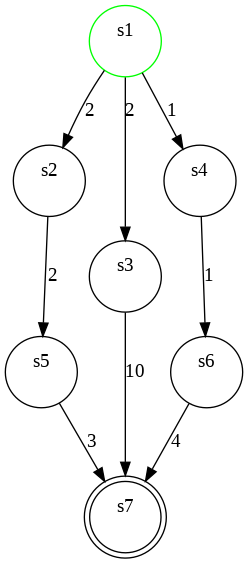


#### Code to auto generate state space model (you don't have to use it)

In [4]:
# Code to auto-generate state space model

states = set(['s{}'.format(i) for i in range(1,8)])
ini_st = 's1'
goal_sts = set(['s7'])

costs = {
    ('s1','s2'):2,
    ('s1','s3'):2,
    ('s1','s4'):1,
    ('s2','s5'):2,
    ('s3','s7'):10,
    ('s4','s6'):1,
    ('s5','s7'):3,
    ('s6','s7'):4,
}


actions = {'s{}'.format(i): set() for i in range(1,8)}
for k1,k2 in costs.keys():
  actions[k1].add((k1,k2))

tranf = {(k[0],k):k[1] for k in costs.keys()}

prob = Problem(initial_state=ini_st, state_space=states, goal_states=goal_sts, actions=actions, transition_function=tranf, costs=costs)

print ('initial_state={}'.format(prob.initial_state))
print ('state_space={}'.format(prob.state_space))
print ('goal_states={}'.format(prob.goal_states))
print ('actions={}'.format(prob.actions))
print ('transition_function={}'.format(prob.transition_function))
print ('costs={}'.format(prob.costs))


initial_state=s1
state_space={'s7', 's5', 's6', 's4', 's2', 's3', 's1'}
goal_states={'s7'}
actions={'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function={('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs={('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}


#### Code to define the problem (i.e. state space model)

In [25]:
initial_state = 's1'
state_space = {'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states = {'s7'}
actions = {'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function = {('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs = {('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

#### Generate the state transition graph for the problem:

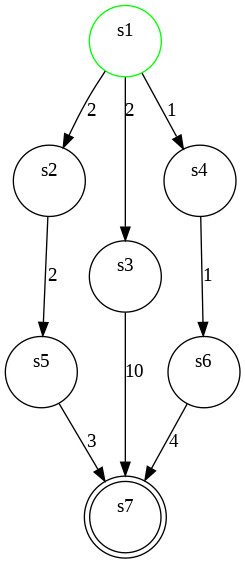

In [6]:
display(Image(render_graph(generate_state_graph(problem))))

---


### Problem 1:


Following the above example, define the state-space model of the graph:

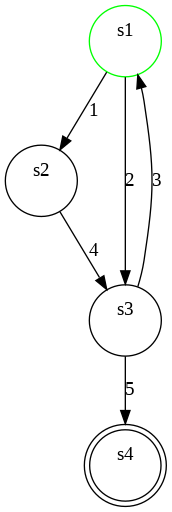

#### Task 1: please complete the following code:

In [7]:
initial_state='s1'
state_space={'s1', 's2', 's4', 's3'}
goal_states={'s4'}
actions={'s1': {('s1', 's3'), ('s1', 's2')}, 's2': {('s2', 's3')}, 's3': {('s3', 's4'), ('s3', 's1')}, 's4': set(), 's5': set(), 's6': set(), 's7': set()}
transition_function={('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's2')): 's2', ('s2', ('s2', 's3')): 's3', ('s3', ('s3', 's1')): 's1', ('s3', ('s3', 's4')): 's4'}
costs={('s1', 's3'): 2, ('s1', 's2'): 1, ('s2', 's3'): 4, ('s3', 's1'): 3, ('s3', 's4'): 5}


problem1 = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)


#### Task 2: try to visulize the state transition graph of your model:

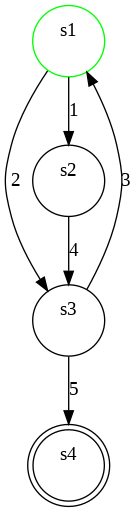

In [9]:
display(Image(render_graph(generate_state_graph(problem1))))

### Problem 2

Run three common blind search algorithms (i.e. BFS, DFS and ID) on the given state space model from the Example. What's the difference between the **state transition graph** and the **search tree** generated during the search process？



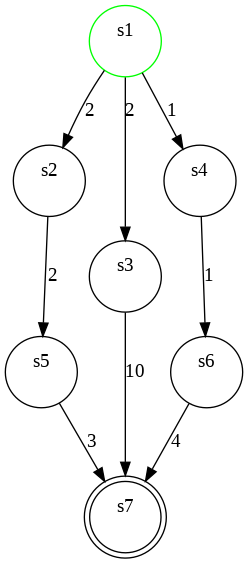


#### Task 1:
Discuss with others, and finish the node expansion order for each algorithm:

##### BrFS(Breadth First Search):


In [10]:
#  Expansion node order
nodes = [ # (state, accumulated cost, id of parent node)
      ('s1',0,None),
      ('s2',2,0),
      ('s3',2,0),
      ('s4',1,0),
      ('s5',4,1),
      ('s7',12,2)
]

In [11]:
visulize_search_process(nodes,problem)

interactive(children=(IntSlider(value=2, description='idx', max=5), Output()), _dom_classes=('widget-interact'…

##### DFS(Depth First Search):

In [12]:
#  Expansion node order
nodes = [ # (state, accumulated cost, id of parent node)
      ('s1',0,None),
      ('s2',2,0),
      ('s5',4,1),
      ('s7',7,2)
]

In [13]:
visulize_search_process(nodes,problem)

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

##### ID(Iterative Deepening):

In [14]:
#  Expansion node order
nodes = [ # (state, accumulated cost, id of parent node)
      ('s1',0,None),
      ('s1',0,None),
      ('s2',2,1),
      ('s3',2,1),
      ('s4',1,1),
      ('s1',0,None),
      ('s2',2,5),
      ('s5',4,6),
      ('s3',2,5),
      ('s7',12,8)
]

In [15]:
visulize_search_process(nodes,problem)

interactive(children=(IntSlider(value=4, description='idx', max=9), Output()), _dom_classes=('widget-interact'…

#### Task 2:

##### Q1: What is the solution found by each algorithm?

- BrFS: s1 -> s3 -> s7
- DFS: s1 -> s2 -> s5 -> s7 (depends on the tie-break rules)
- ID: s1 -> s3 -> s7

##### Q2: What is the actual optimal solution?

- s1 -> s4 -> s6 -> s7

##### Q3: Explain under which conditions the algorithms guarantee optimality?

- BrFS: with uniform cost
- DFS: Can't guarantee
- ID: with uniform cost

##### Q4: Can any of the previous algorithms be adapted to account for $g(n)$ in order to make it optimal?

If tiebreaker for BrFS was minimum g(n)

### Problem 3:


Describe a simple example of *Travelling Salesman Problem* along with its corresponding **State Space Model**.



Definition should be brief, clear, and
*compact* (*compact* means using mathematical notation to
  define sets, i.e. $S = \{ x | x \in V \}$ to define that there are
  as many states as elements in the set $V$, and pseudo-code, i.e. to
  define the transition function.)

1. State space $S$
2. Initial state $s_0 \in S$
3. Set of goal states  $S_G \subseteq S$
4. Applicable actions function $A(s)$ for each state $s \in S$
5. Transition function $f(s,a)$ for $s \in S$ and $a \in A(s)$
6. Cost of each action $c(a)$ for $a \in A(s)$



**Hint**: Consider a set of cities $V$ to visit in any order, a starting city location $v_{start}$, and a set of edges $E$ specifying if there's an edge from two cities $\langle v_1, v_2 \rangle$.
Let $V'$ be the set of cities has been visited.

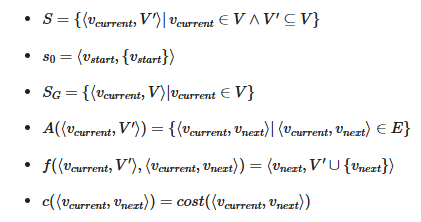

### Challenge Problem 1:

Review problem 2, instead of manual input the node expansion order, now you can try to implement those blind search algorithm on your own.

#### State transition graph:

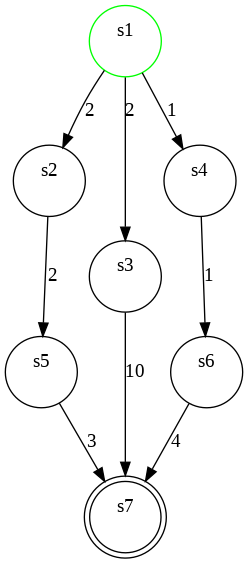


In [17]:
# what's inside problem class
initial_state = 's1'
state_space = {'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states = {'s7'}
actions = {'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function = {('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs = {('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

#### Algorithm Implementation: BFS

In [32]:
# Instead of return the final solution, your function here should append the node when it gets expanded, and return the expanded list
def BFS(problem):
    expansion_order = []
    # Your code here:
    open_list = [(problem.initial_state, 0, None)]
    while open_list:
      curr = open_list.pop(0)
      expansion_order.append(curr)
      state, accu_cost, parent_node_id = curr

      if state in problem.goal_states:
        return expansion_order

      curr_actions = problem.actions[state]
      for action in curr_actions:
        succ_state = problem.transition_function[(state, action)]
        cost = accu_cost + problem.costs[action]
        open_list.append((succ_state, cost, len(expansion_order)-1))

    return expansion_order

In [46]:
visulize_search_process(BFS(problem),problem)

interactive(children=(IntSlider(value=2, description='idx', max=4), Output()), _dom_classes=('widget-interact'…

#### Algorithm Implementation: DFS

In [43]:
# Instead of return the final solution, your function here should append the node when it gets expanded, and return the expanded list
def DFS(problem):
    expansion_order = []
    # Your code here:
    open_list = [(problem.initial_state, 0, None)]
    while open_list:
      curr = open_list.pop()
      expansion_order.append(curr)
      state, accu_cost, parent_node_id = curr

      if state in problem.goal_states:
        return expansion_order

      curr_actions = problem.actions[state]
      for action in curr_actions:
        succ_state = problem.transition_function[(state, action)]
        cost = accu_cost + problem.costs[action]
        open_list.append((succ_state, cost, len(expansion_order)-1))

    return expansion_order

In [44]:
visulize_search_process(DFS(problem),problem)

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

#### Algorithm Implementation: ID

In [52]:
# Instead of return the final solution, your function here should append the node when it gets expanded, and return the expanded list
def ID(problem):
    expansion_order = []
    # Your code here:
    max_depth = 0
    while True:
        open_list = [((problem.initial_state, 0, None), 0)]
        while open_list:
          curr, depth = open_list.pop()
          expansion_order.append(curr)
          state, accu_cost, parent_node_id = curr

          if state in problem.goal_states:
            return expansion_order

          if depth < max_depth:
            curr_actions = problem.actions[state]
            for action in curr_actions:
              succ_state = problem.transition_function[(state, action)]
              cost = accu_cost + problem.costs[action]
              open_list.append(((succ_state, cost, len(expansion_order)-1), depth+1))

        max_depth += 1

    return expansion_order

In [54]:
visulize_search_process(ID(problem),problem)

interactive(children=(IntSlider(value=5, description='idx', max=11), Output()), _dom_classes=('widget-interact…